In [1]:
rootF = 'D:/Data/Paper defocus/'

In [2]:
import os as os
import numpy as np
from numpy import *
from scipy.stats import linregress, wilcoxon
from scipy.optimize import curve_fit

# Plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# Import functions
from shared.functions import corrcoef, convert_pvalue_to_stars
from shared.save_load import load_obj, save_obj

In [3]:
experiments = [20211129, 20211207, 20211208]

# Experiment conditions
from shared.parameters_stimulation2 import *

In [4]:
### Cells from the 2 interesting types

selected_cells = [[140, 508, 625, 681],             # exp 20211129 OFF slow ON-OFF
                   [165, 253, 277, 378],                          # exp 20211207 OFF slow ON-OFF
                   [20, 119, 125, 130, 195, 380, 460]]   # exp 20211208 OFF slow ON-OFF

OFF_slow = [20, 125, 195, 140, 508, 625, 378, 277, 253]
ON_OFF_loc = [681, 165, 119, 130, 380, 460]

print ('N = ', len(OFF_slow) + len(ON_OFF_loc))

N =  15


# Load data

### Spike counts

#### Train and test sets

In [5]:
clusters_all_exps = []
train_y_all_exps = []
train_int_all_exps = []
train_lsc_all_exps = []
test_y_all_exps = []
test_int_all_exps = []
test_lsc_all_exps = []

for iExp, exp in enumerate(experiments):
    data_path = rootF + '/MEA/exp' + str(exp) + '/'
    train_data = load(data_path + str(exp) + '_liu_2022_data.npz', allow_pickle=True)

    clusters = train_data['clusters']
    clusters_all_exps.append(clusters)

    train_y_all_exps.append(train_data['spike_count_train']) 
    train_int_all_exps.append(train_data['intensities_train']) 
    train_lsc_all_exps.append(train_data['contrast_train'])
    
    test_y_all_exps.append(train_data['spike_count_test'].mean(axis=0))
    test_int_all_exps.append(train_data['intensities_test'])
    test_lsc_all_exps.append(train_data['contrast_test'])

    print (train_data['spike_count_train'].shape)
    print (test_y_all_exps[iExp].shape)
    print (test_int_all_exps[iExp].shape)

(3160, 116)
(30, 116)
(30, 4)
(3160, 132)
(30, 132)
(30, 4)
(3160, 150)
(30, 150)
(30, 7)


# Models

In [6]:
def softplus_fct(x, a, b, c):
    return a * np.log(1 + np.exp(b * (x + c)))

In [7]:
def random_search(function, input_, target, rn_nb, method='lm'):  #'trf','dogbox'
    ### Range of initial values
    # Values working for cell 130 too
    a0_range=np.arange(0,2,0.01)
    b0_range=np.arange(0,200,0.1)
    c0_range=np.arange(-0.5,0.5,.0001)

    points=[]
    for run in range(rn_nb):
        a0=random.choice(a0_range)
        b0=random.choice(b0_range)
        c0=random.choice(c0_range)
        try:
            popt, covar = curve_fit(function, input_, target, p0 = [a0, b0, c0], method=method)
            trial = function(input_,*popt)
            points.append(np.append(popt,((trial-target)**2).sum()))
        except RuntimeError:
            points.append(np.append(np.zeros(3),100000 ))

    points=np.array(points)
#     print (points)
    return points[points[:,-1].argmin(),:]

## Fit LN model

140 140


/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 1.00394224e+00 -1.50415202e+02 -2.27095032e-02]


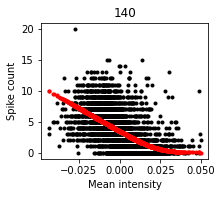

508 508


/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[6.36171519e-01 3.91405579e+02 1.54426007e-02]


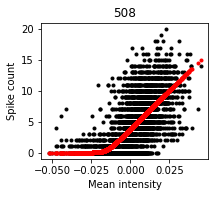

625 625


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[2.61393592e-01 2.08453051e+03 1.09267618e-02]


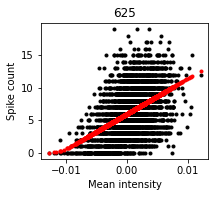

681 681


/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 6.05827510e+06  9.17322790e+01 -1.74382213e-01]


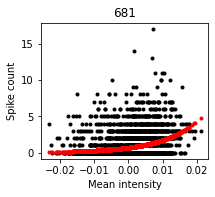

165 165


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[ 7.32473256e+03  5.39667973e+01 -1.60987714e-01]


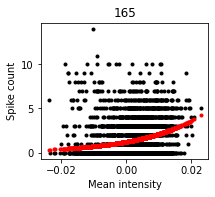

253 253


/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[6.10272795e-01 4.81126988e+02 5.79342702e-03]


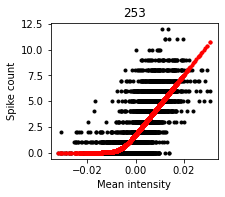

277 277


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[3.65600637e-01 2.79285290e+02 2.61486489e-02]


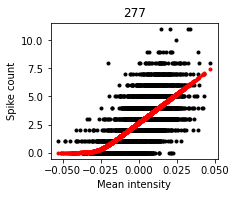

378 378


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[6.87122704e-01 1.76441855e+02 1.86661835e-02]


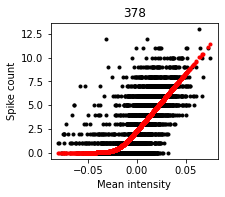

20 20


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[ 1.78269965e+00 -1.10395991e+02 -2.89240339e-03]


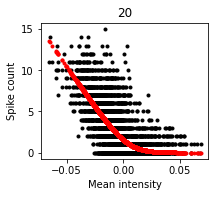

119 119


/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 4.72562766e+00 -5.82290909e+01  2.94637060e-02]


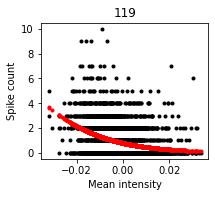

125 125


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[ 1.13487401e-01 -2.69033277e+02 -2.27135246e-02]


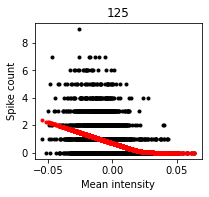

130 130


/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 1.02818008e+14  7.80000000e+01 -4.19500000e-01]


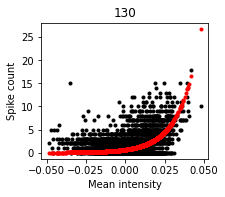

195 195


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[ 7.06343245e-01 -2.31548364e+02 -1.35905205e-02]


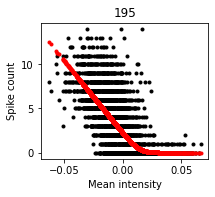

380 380


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[ 2.73932485e+00  1.48593998e+02 -7.31285960e-03]


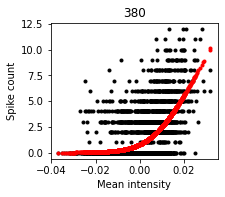

460 460


/tmp/ipykernel_15073/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[9.62101577e-01 1.80445848e+02 9.52702079e-03]


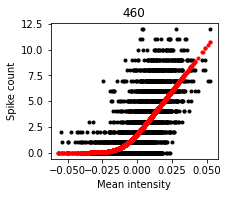

In [9]:
params_ln_all_exps = []

for iExp in range(len(experiments)):
    params_ln = np.zeros((len(selected_cells[iExp]), 3))

    for iCell, cell_nb in enumerate(selected_cells[iExp]):
        index = where(clusters_all_exps[iExp] == cell_nb)[0][0]
        print (cell_nb, clusters_all_exps[iExp][index])

        best_params = random_search(softplus_fct, train_int_all_exps[iExp][:, iCell], train_y_all_exps[iExp][:, index], rn_nb=50)[:-1]
        params_ln[iCell] = best_params
        print (best_params)

        plt.figure(figsize=(3,2.5))
        plt.title(cell_nb)
        plt.plot(train_int_all_exps[iExp][:, iCell], train_y_all_exps[iExp][:, index], 'k.')
        plt.plot(train_int_all_exps[iExp][:, iCell], softplus_fct(train_int_all_exps[iExp][:, iCell], *best_params), 'r.')
        plt.xlabel('Mean intensity')
        plt.ylabel('Spike count')
        plt.show()
    params_ln_all_exps.append(params_ln)

## Test LN model

140 140


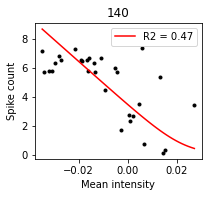

508 508


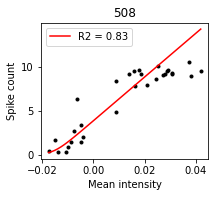

625 625


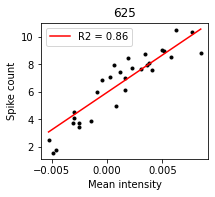

681 681


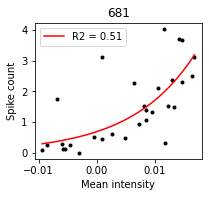

165 165


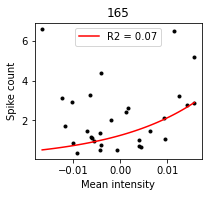

253 253


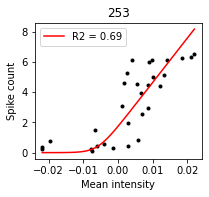

277 277


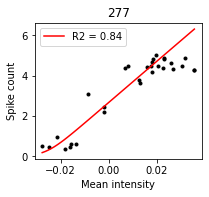

378 378


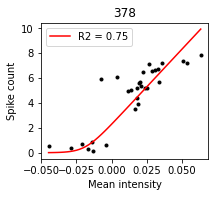

20 20


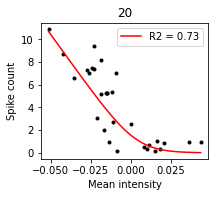

119 119


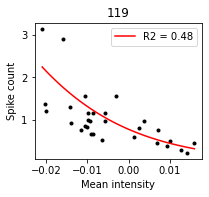

125 125


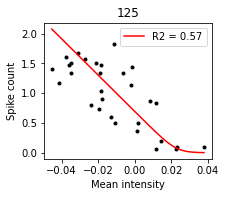

130 130


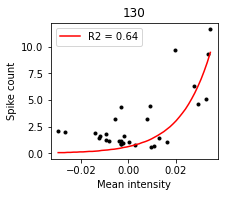

195 195


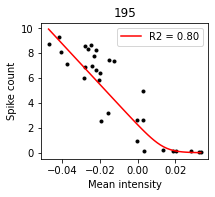

380 380


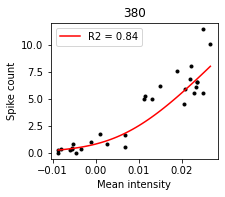

460 460


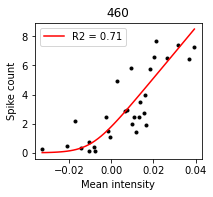

In [10]:
explained_vars_LN_model_all_exps = []

for iExp in range(len(experiments)):
    explained_vars_LN_model = np.zeros((len(selected_cells[iExp])))

    for iCell, cell_nb in enumerate(selected_cells[iExp]):
        index = where(clusters_all_exps[iExp] == cell_nb)[0][0]
        print (cell_nb, clusters_all_exps[iExp][index])

        x_vals = np.linspace(min(test_int_all_exps[iExp][:, iCell]), max(test_int_all_exps[iExp][:, iCell]), 50)
        prediction = softplus_fct(test_int_all_exps[iExp][:, iCell], *params_ln_all_exps[iExp][iCell])
        corr_coef = corrcoef(prediction, test_y_all_exps[iExp][:, index])
        explained_vars_LN_model[iCell] = corr_coef**2

        plt.figure(figsize=(3,2.5))
        plt.title(cell_nb)
        plt.plot(test_int_all_exps[iExp][:, iCell], test_y_all_exps[iExp][:, index], 'k.')
        plt.plot(x_vals, softplus_fct(x_vals, *params_ln_all_exps[iExp][iCell]), 'r-', label = 'R2 = %0.02f'%corr_coef**2)
        plt.xlabel('Mean intensity')
        plt.ylabel('Spike count')
        plt.legend()
        plt.show()
        
    explained_vars_LN_model_all_exps.append(explained_vars_LN_model)

0.6539018537317938 0.20343790335089335
N =  15


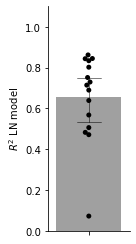

In [11]:
stacked_ln_expl_vars = hstack([explained_vars_LN_model_all_exps[0], \
                               explained_vars_LN_model_all_exps[1], \
                               explained_vars_LN_model_all_exps[2]])

print (mean(stacked_ln_expl_vars), std(stacked_ln_expl_vars))
print ('N = ', len(stacked_ln_expl_vars))

fig = plt.figure(figsize=(2,3.5))
GS = fig.add_gridspec(1, 1)

ax = fig.add_subplot(GS[0])
ax.set_ylim(0, 1.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(y = stacked_ln_expl_vars, color = 'grey', alpha = 0.75, errcolor='k', errwidth = 0.5, capsize = 0.3)
sns.swarmplot(y = stacked_ln_expl_vars, color='k')
ax.set_xticklabels([])
ax.set_ylabel('$R^2$ LN model')

plt.tight_layout()
plt.show()

## Fit LSC model

In [12]:
rn_nb = 50
method = 'lm'
w_range = np.arange(-2,2.55,0.05)

results_file = rootF + '/Modelling/Liu_2022_params_LSC_model.npz'

if os.path.isfile(results_file):
    print ('Loading data')
    data = np.load(results_file, allow_pickle=True)
    params_lsc_model_all_exps = data['LSC_model_params']
    lsc_weights_all_exps = data['LSC_weights']
else:
    params_lsc_model_all_exps = []
    lsc_weights_all_exps = []

    for iExp in range(len(experiments)):
        params_lsc_model = np.zeros((len(selected_cells[iExp]), 3)) 
        lsc_weights = np.zeros((len(selected_cells[iExp]))) 

        for iCell, cell_nb in enumerate(selected_cells[iExp]):
            index = where(clusters_all_exps[iExp] == cell_nb)[0][0]
            print (cell_nb, clusters_all_exps[iExp][index])

            params = []
            for w in w_range:
                input_ = train_int_all_exps[iExp][:, iCell] + w*train_lsc_all_exps[iExp][:, iCell]
                target = train_y_all_exps[iExp][:, index]

                ##### Optimizing a,b,c
                # Values working for cell 130 too
                a0_range=np.arange(0,2,0.01)
                b0_range=np.arange(0,200,0.1)
                c0_range=np.arange(-0.5,0.5,.0001)

                points=[]
                for run in range(rn_nb):
                    a0=random.choice(a0_range)
                    b0=random.choice(b0_range)
                    c0=random.choice(c0_range)
                    try:
                        popt, covar = curve_fit(lambda x, a, b, c: a * np.log(1 + np.exp(b * (x + c))), \
                                                input_, target, p0 = [a0, b0, c0], method=method)
                        trial = softplus_fct(input_,*popt)
                        points.append(np.append(popt,((trial-target)**2).sum()))
                    except RuntimeError:
                        points.append(np.append(np.zeros(3),100000 ))

                points=np.array(points)
                best_popt = points[points[:,-1].argmin(),:]
                params.append(best_popt)

            ### Selecting the best weight
            params = np.array(params)
            best_idx = argmin(params[:,-1])
            params_lsc_model[iCell] = params[best_idx,:][:-1]
            lsc_weights[iCell] = w_range[best_idx]

        lsc_weights_all_exps.append(lsc_weights)
        params_lsc_model_all_exps.append(params_lsc_model)

140 140


/tmp/ipykernel_15073/3845968078.py:41: RuntimeWarning: overflow encountered in exp
  popt, covar = curve_fit(lambda x, a, b, c: a * np.log(1 + np.exp(b * (x + c))), \
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


508 508
625 625
681 681
165 165
253 253
277 277
378 378
20 20
119 119
125 125
130 130
195 195
380 380
460 460


In [13]:
# Save this selection

output_folder = rootF + '/Modelling/'
    
np.savez(output_folder + 'Liu_2022_params_LSC_model.npz', \
      LSC_weights = np.array(lsc_weights_all_exps, dtype='object'),\
      LSC_model_params = np.array(params_lsc_model_all_exps, dtype='object'))

## Test LSC model

140 140


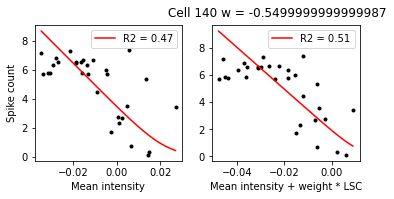

508 508


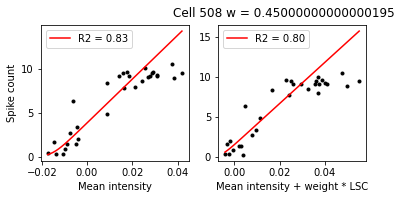

625 625


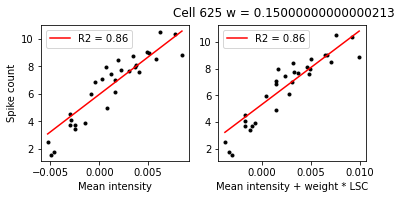

681 681


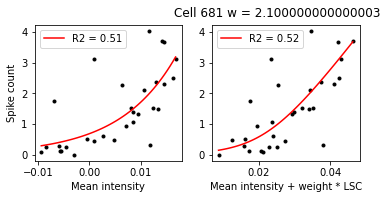

165 165


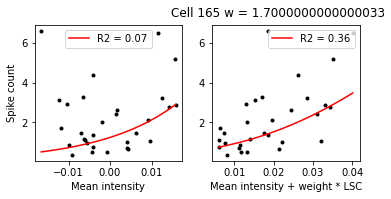

253 253


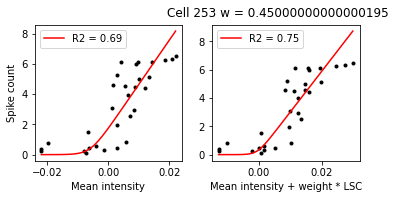

277 277


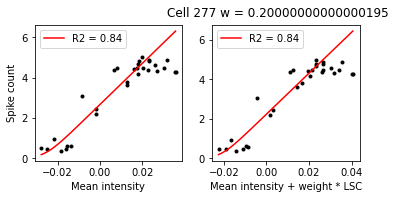

378 378


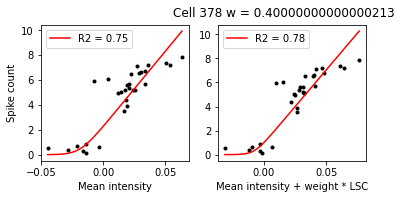

20 20


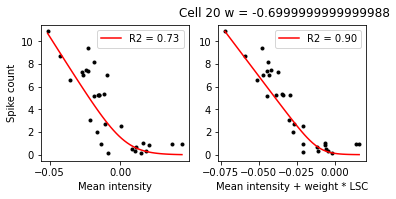

119 119


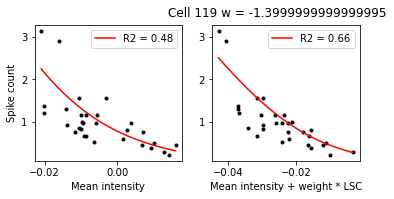

125 125


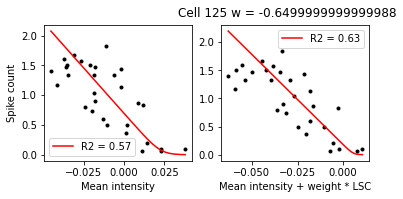

130 130


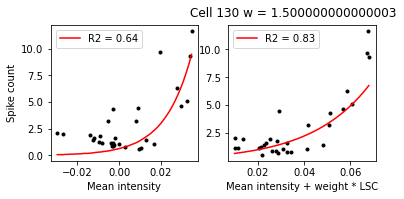

195 195


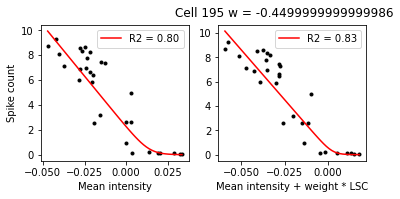

380 380


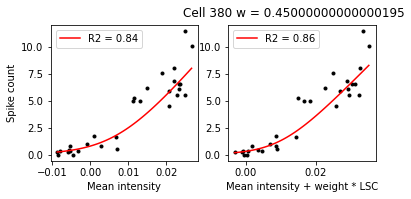

460 460


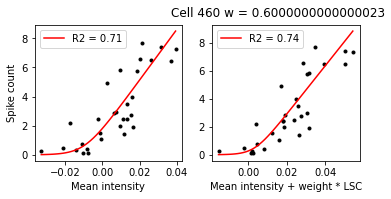

In [14]:
explained_vars_LSC_model_all_exps = []

for iExp in range(len(experiments)):
    explained_vars_LSC_model = np.zeros((len(selected_cells[iExp])))

    for iCell, cell_nb in enumerate(selected_cells[iExp]):
        index = where(clusters_all_exps[iExp] == cell_nb)[0][0]
        print (cell_nb, clusters_all_exps[iExp][index])
        
        ### LSC
        input_ = test_int_all_exps[iExp][:, iCell] + lsc_weights_all_exps[iExp][iCell]*test_lsc_all_exps[iExp][:, iCell]
        prediction = softplus_fct(input_, *params_lsc_model_all_exps[iExp][iCell])
        corr_coef_lsc = corrcoef(prediction, test_y_all_exps[iExp][:, index])
        explained_vars_LSC_model[iCell] = corr_coef_lsc**2

        plt.figure(figsize=(9,2.5))
        plt.suptitle('Cell {} w = {}'.format(cell_nb, lsc_weights_all_exps[iExp][iCell]))
        plt.subplot(131)
        x_vals = np.linspace(min(test_int_all_exps[iExp][:, iCell]), max(test_int_all_exps[iExp][:, iCell]), 50)
        plt.plot(test_int_all_exps[iExp][:, iCell], test_y_all_exps[iExp][:, index], 'k.')
        plt.plot(x_vals, softplus_fct(x_vals, *params_ln_all_exps[iExp][iCell]), 'r-', \
                 label = 'R2 = %0.02f'%explained_vars_LN_model_all_exps[iExp][iCell])
        plt.xlabel('Mean intensity')
        plt.ylabel('Spike count')
        plt.legend()
        plt.subplot(132)
        plt.plot(input_, test_y_all_exps[iExp][:, index], 'k.')
        x_vals = np.linspace(min(input_), max(input_), 50)
        plt.plot(x_vals, softplus_fct(x_vals, *params_lsc_model_all_exps[iExp][iCell]), 'r-', label = 'R2 = %0.02f'%corr_coef_lsc**2)
        plt.xlabel('Mean intensity + weight * LSC')
        plt.legend()

        plt.show()
    explained_vars_LSC_model_all_exps.append(explained_vars_LSC_model)

0.7136568554938812 0.15369797318389253


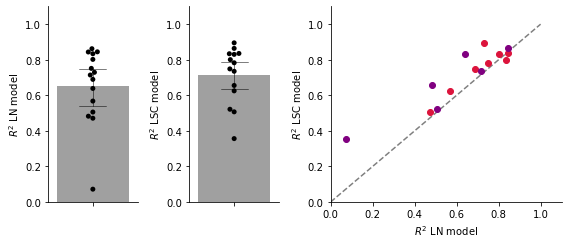

In [15]:
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.arange(0,20,1)]

skip_cells = [558, 625]

fig = plt.figure(figsize=(8,3.5))
GS = fig.add_gridspec(1, 4)

ax = fig.add_subplot(GS[0])
ax.set_ylim(0, 1.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(y = stacked_ln_expl_vars, color = 'grey', alpha = 0.75, errcolor='k', errwidth = 0.5, capsize = 0.3)
sns.swarmplot(y = stacked_ln_expl_vars, color='k')
ax.set_xticklabels([])
ax.set_ylabel('$R^2$ LN model')

ax = fig.add_subplot(GS[1])
stacked_lsc_expl_vars = hstack([explained_vars_LSC_model_all_exps[0][:2], explained_vars_LSC_model_all_exps[0][-1], \
                                explained_vars_LSC_model_all_exps[1], \
                                explained_vars_LSC_model_all_exps[2]])

print (mean(stacked_lsc_expl_vars), std(stacked_lsc_expl_vars))

ax.set_ylim(0, 1.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(y = stacked_lsc_expl_vars, color = 'grey', alpha = 0.75, errcolor='k', errwidth = 0.5, capsize = 0.3)
sns.swarmplot(y = stacked_lsc_expl_vars, color='k')
ax.set_xticklabels([])
ax.set_ylabel('$R^2$ LSC model')

ax = fig.add_subplot(GS[2:4])
ax.set_ylim(0, 1.1)
ax.set_xlim(0, 1.1)
ax.plot([0,1], [0,1], 'k--', alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for iExp in range(len(experiments)):
    for iCell, cell_nb in enumerate(selected_cells[iExp]):
        if cell_nb in OFF_slow and cell_nb not in skip_cells:
            ax.plot(explained_vars_LN_model_all_exps[iExp][iCell], \
                    explained_vars_LSC_model_all_exps[iExp][iCell], 'o', color='crimson')
        if cell_nb in ON_OFF_loc and cell_nb not in skip_cells:
            ax.plot(explained_vars_LN_model_all_exps[iExp][iCell], \
                    explained_vars_LSC_model_all_exps[iExp][iCell], 'o', color='purple')
ax.set_ylabel('$R^2$ LSC model')
ax.set_xlabel('$R^2$ LN model')
plt.tight_layout()
plt.show()

In [16]:
### Save data for Figure 4

output_folder = rootF + '/Modelling/'
    
iExp = 2
cell_nb = 130
iCell = where(array(selected_cells[iExp]) == cell_nb)[0][0]
index = where(clusters_all_exps[iExp] == cell_nb)[0][0]
print (cell_nb, clusters_all_exps[iExp][index])

### LN
x_vals_LN = np.linspace(1.2*min(test_int_all_exps[iExp][:, iCell]), 1.2*max(test_int_all_exps[iExp][:, iCell]), 50)
prediction_LN = softplus_fct(x_vals_LN, *params_ln_all_exps[iExp][iCell])

### LSC
input_ = test_int_all_exps[iExp][:, iCell] + lsc_weights_all_exps[iExp][iCell]*test_lsc_all_exps[iExp][:, iCell]
x_vals_LSC = np.linspace(0.8*min(input_), 1.2*max(input_), 50)
prediction_LSC = softplus_fct(x_vals_LSC, *params_lsc_model_all_exps[iExp][iCell])

np.savez(output_folder + 'data_figure_4.npz', selected_cells = np.array(selected_cells, dtype='object'), \
      intensity = test_int_all_exps[iExp][:, iCell], spike_counts = test_y_all_exps[iExp][:, index],\
      x_pred_LN = x_vals_LN, predictions_LN = prediction_LN,\
      intensity_and_SC = input_, x_pred_LSC = x_vals_LSC, predictions_LSC = prediction_LSC,\
      expl_var_LN = np.array(explained_vars_LN_model_all_exps, dtype='object'), \
      expl_var_LSC = np.array(explained_vars_LSC_model_all_exps, dtype='object'))


130 130
